**When using pytorch, it is important that the output has the right dimension. For example, if Y is one-dimensional, the Y vector must have shape (batch_size, 1) and not just shape (batch_size). The below examples demonstrates this.**

In [8]:
# import relevant packages
import torch
import numpy as np
import matplotlib.pyplot as plt

# get data
X = np.random.randn(100, 1) # generate some random data
Y1 = X # shape n x 1
Y2 = X[:, 0] # shape n

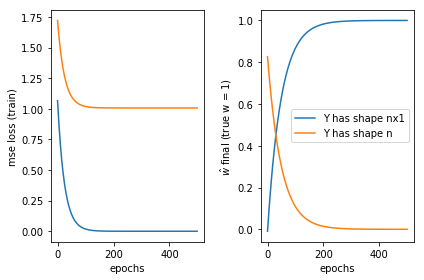

In [9]:
# try different shapes of Y
for i, Y in enumerate([Y1, Y2]):
    model = torch.nn.Linear(1, 1, bias=False) # model is just one weight (with no bias)

    X_torch = torch.Tensor(X)
    Y_torch = torch.Tensor(Y)

    # hyperparameters
    lr = 1e-2 # the learning rate
    optimizer = torch.optim.SGD(model.parameters(), lr=lr) # 1e6 worked 
    criterion =  torch.nn.MSELoss()


    losses = []
    ws = []
    
    # train for 500 steps
    for it in range(500):
        loss = criterion(model(X_torch), Y_torch)
        pred = model(X_torch).flatten()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.detach().item())
        ws.append(model.weight.item())
        
    plt.subplot(121)
    label = 'Y has shape nx1' if i == 0 else 'Y has shape n'
    plt.plot(losses, label=label)
    plt.xlabel('epochs')
    plt.ylabel('mse loss (train)')
    
    plt.subplot(122)
    plt.plot(ws, label=label)
    plt.xlabel('epochs')
    plt.ylabel('$\hat{w}$ final (true w = 1)')

plt.legend()    
plt.tight_layout()
plt.show()